# Measure Clinker hydrate fringe
This is a script to measure the hydrate fringe around a clinker grain.

## loading required libaries

In [1]:
from functions import *

load_example = True
home_dir = os.path.abspath("")

## load file
select the specimen and age to be analysed in this notebook

In [2]:
specimen = 'C3S' # or C2S
age      = 7 # in days. Open "known_datasets.json to see, which images are available.

f = load_known_file( specimen, age, image_id = 0 ) # for some specimen ages, there are multiple datasets available

Select the relevant data from the dictionary and basic settings.

These data may be overwritten manually. Just define the tiff-image to be processed, select the thresholds which separate pores from hydrate (`t_pores`) and hydrate from unhydrated clinker (`t_clinker`) and define the lower limit for the rim-width (`min_rim`). The age is relevant for the final evaluation notebook (`final_evaluation.ipynb`).

If a manual segmentation result exists, it can be loaded by giving the folder name containing the segmentation results. The folder has to contain tif images named `C3S.tif` or `C2S.tif`, `CH.tif`, and `CSH.tif`. White / value 255 means true, black/ value 0 means false. The pore segmentation is calculated from the difference.

Loaded an image with 2929 x 2929 px
 - scaling: 0.0809 µm / px
 - size:    237.1 x 237.1 µm = 0.06 mm²

 - Selected color thresholds: 0-103 for pores 104-184 for hydrates and 185-255 for alite
 - Analyzing gains with areas from 0.066 µm² up to 176.71 µm²
 - Analyzing gains with diameters from 0.30 µm up to 15.0 µm

metadata saved to C:\Users\Florian Kleiner\Desktop\measure_hydrate_layer\measure_hydrate_layer\last_processed_C3S.meta


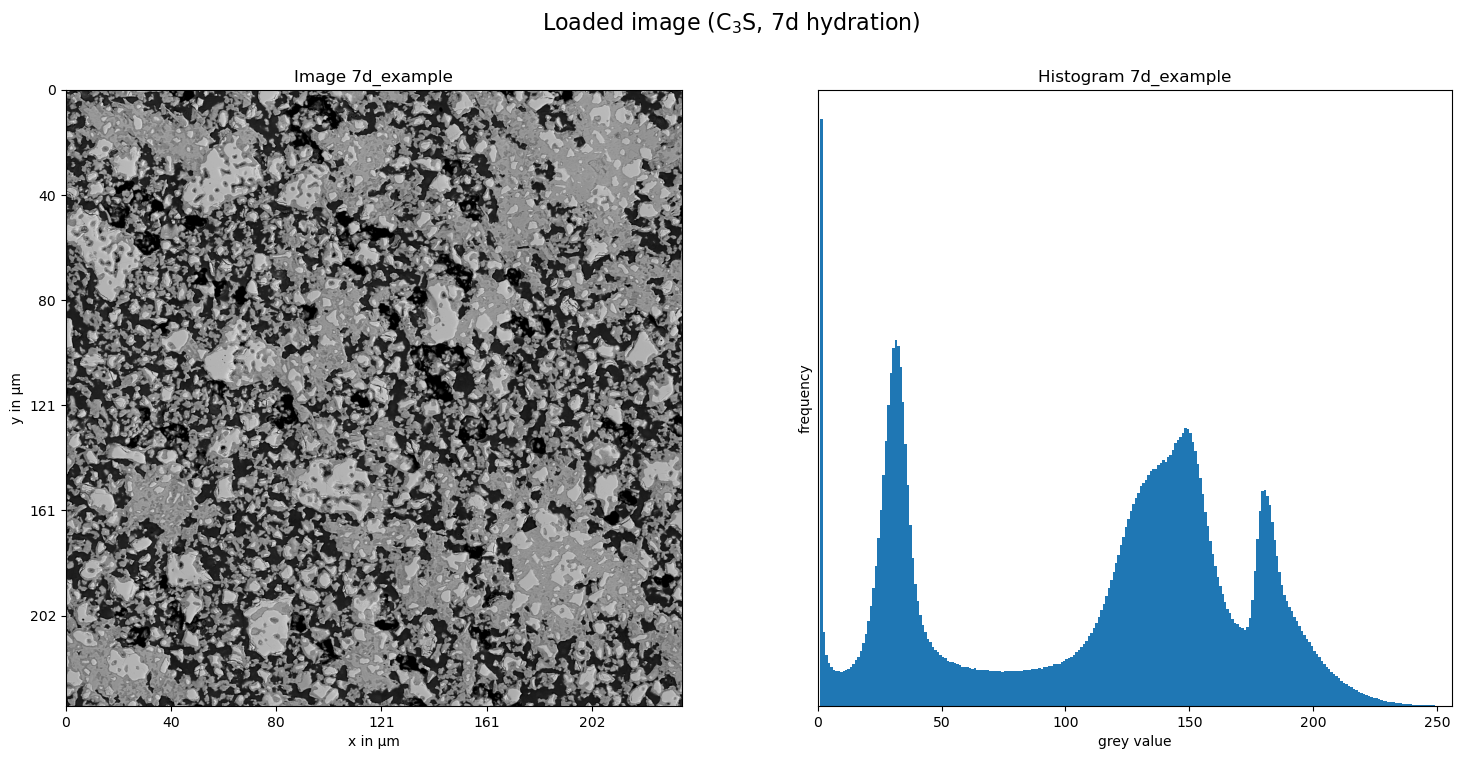

In [3]:
show_images = True
settings = {
    'specimen'            : specimen,
    'age'                 : age, # in days
    'label'               : f['label'],
    't_pores'             : f['t_pores'],
    't_clinker'           : f['t_clinker'],
    'enhance_hist'        : True,
    'denoise'             : True,
    'denoising_algorithm' : 'nlm',
    'min_grain_dia'       :  0.30,  # diameter in µm
    'max_grain_dia'       : 15.00, # diameter in µm
    'min_circularity'     :  0.10,  # 0.0-1.0, where 1.0 is a perfect circle
    'max_rim'             :  9.0,
    'min_rim'             : f['min_rim'],
    'reduce'              : False,
    #'segmentation_folder' : 'guided_segmentation'   # load segmented masks from given folder in the same root directory of the raw image
}
IP = Image_Processor( f['file_path'], settings, show_images = show_images )

Loading pre-filtered image


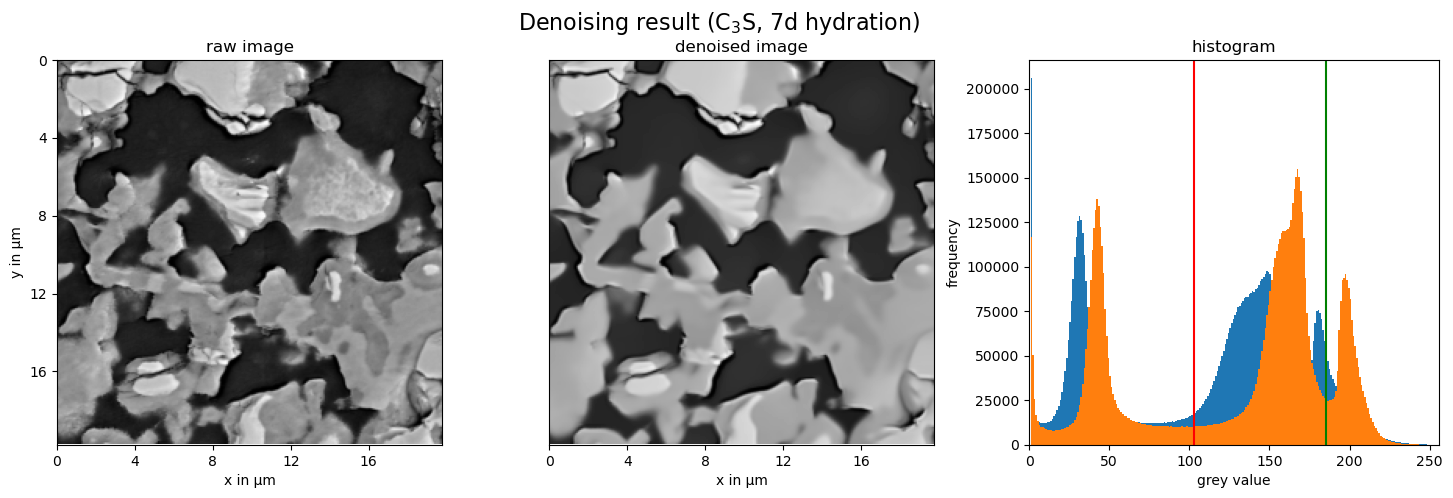

In [4]:
# enhance contrast and or denoise
IP.filter_image()

  5% done
 10% done
 15% done
 20% done
 25% done
 30% done
 35% done
 40% done
 45% done
 50% done
 55% done
 60% done
 65% done
 70% done
 75% done
 80% done
 85% done
 90% done
 95% done
100% done
fill holes took 9 s
pores: 32.3%, hydrates: 50.4%, C$_{3}}$S, 7d hydration: 17.4%


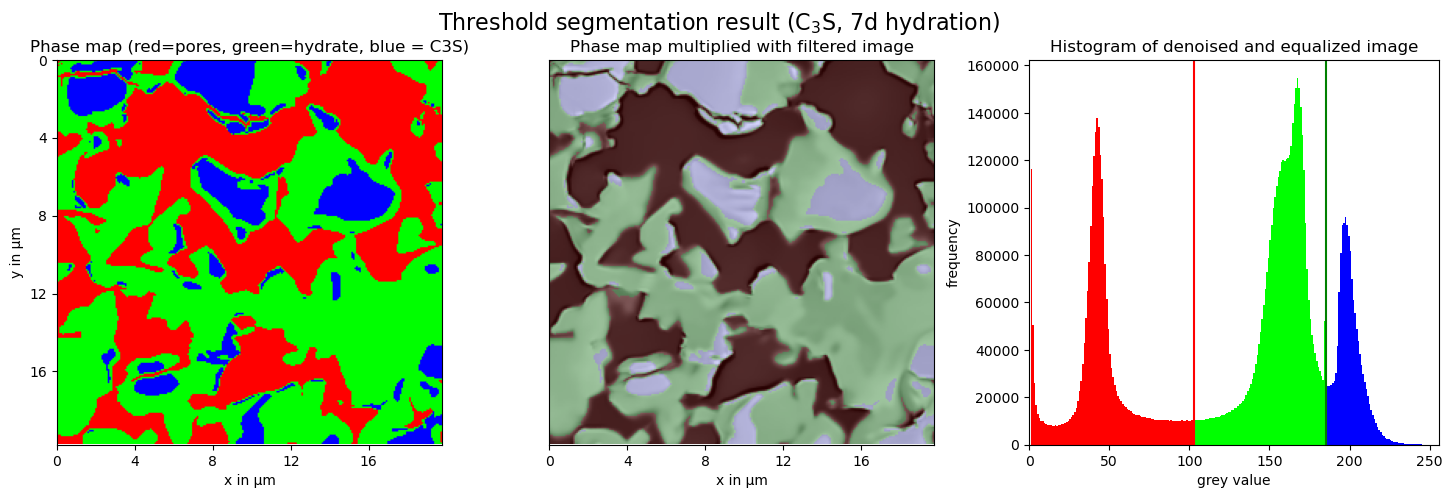

In [5]:
if IP.do_segmentation:
	IP.set_thresholds( )
	if show_images: IP.plot_thresh_result( )
else:
	IP.find_clinker_grains(  )
	IP.set_masks(  )

In [6]:
IP.filter_contours(verbose = False)

  5% done
 10% done
 15% done
 20% done
 25% done
 30% done
 35% done
 40% done
 45% done
 50% done
 55% done
 60% done
 65% done
 70% done
 75% done
 80% done
 85% done
 90% done
 95% done
100% done


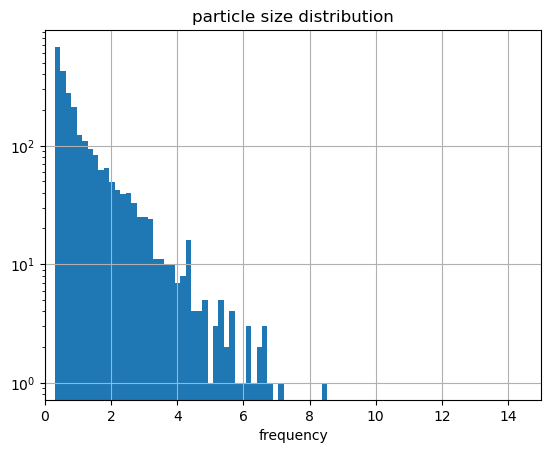

In [7]:
if show_images:
    #IP.plot_selected_contours( )

    ax = IP.df_particles['diameter'].hist(bins=50)
    ax.set_title("particle size distribution")
    ax.set_xlabel("diameter in {}".format(IP.unit))
    ax.set_xlabel("frequency".format(IP.unit))
    ax.set_xlim([0,IP.settings['max_grain_dia']])
    ax.set_yscale('log')
    plt.show()

In [8]:
IP.process_particles(multithreading=True, processCount=7, load_saved=False)

Using 7 processes to measure the hydrate fringes of 2515 particles.
  5% done, estimated time: 2.7 min, remaining time: 2.5 min
 10% done, estimated time: 2.1 min, remaining time: 1.9 min
 15% done, estimated time: 2.2 min, remaining time: 1.8 min
 20% done, estimated time: 2.3 min, remaining time: 1.9 min
 25% done, estimated time: 2.5 min, remaining time: 1.9 min
 30% done, estimated time: 2.9 min, remaining time: 2.0 min
 35% done, estimated time: 3.2 min, remaining time: 2.1 min
 40% done, estimated time: 3.6 min, remaining time: 2.1 min
 45% done, estimated time: 3.9 min, remaining time: 2.1 min
 50% done, estimated time: 4.2 min, remaining time: 2.1 min
 55% done, estimated time: 4.6 min, remaining time: 2.1 min
 60% done, estimated time: 5.0 min, remaining time: 2.0 min
 65% done, estimated time: 5.5 min, remaining time: 1.9 min
 70% done, estimated time: 5.9 min, remaining time: 1.7 min
 75% done, estimated time: 6.2 min, remaining time: 1.5 min
 80% done, estimated time: 6.7 m

a * e^(-0.5 * ((log(x-d)-b)/c)^2)
a = 0.894±0.019,
b = -0.573±0.118,
c = 0.784±0.053,
d = 0.133±0.057
33.3 % of measurements: 0.73+0.24-0.32 µm / 0.49 to 1.05 µm
50.0 % of measurements: 0.73+0.40-0.49 µm / 0.32 to 1.21 µm


c:\Users\Florian Kleiner\Desktop\measure_hydrate_layer\measure_hydrate_layer\functions.py:439: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plot = ax[1,0].pcolormesh(Y, X, Z, vmin=0, vmax=1.0, cmap='ocean_r')


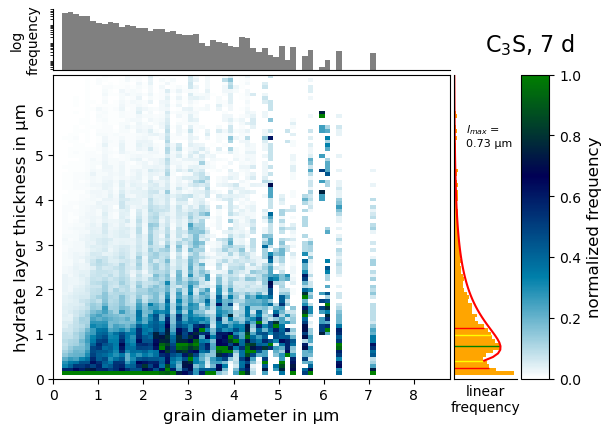

In [9]:
est_minima = IP.settings['min_rim'] # estimated first minima for curve fitting
max_dia = 9 #IP.settings['max_grain_dia']
max_dia_rim = 7 #IP.settings['max_rim']
df_particles = IP.df_particles[(IP.df_particles.circularity > 0.3)]
r_max = plot_2d_result(df_particles, IP.df_hydrate_fringes, specimen, f['label_short'], age, IP.scaling['x'], IP.unit, est_minima, width_f = 1/8, smooting_f = 1, max_dia = max_dia, max_dia_rim = max_dia_rim)

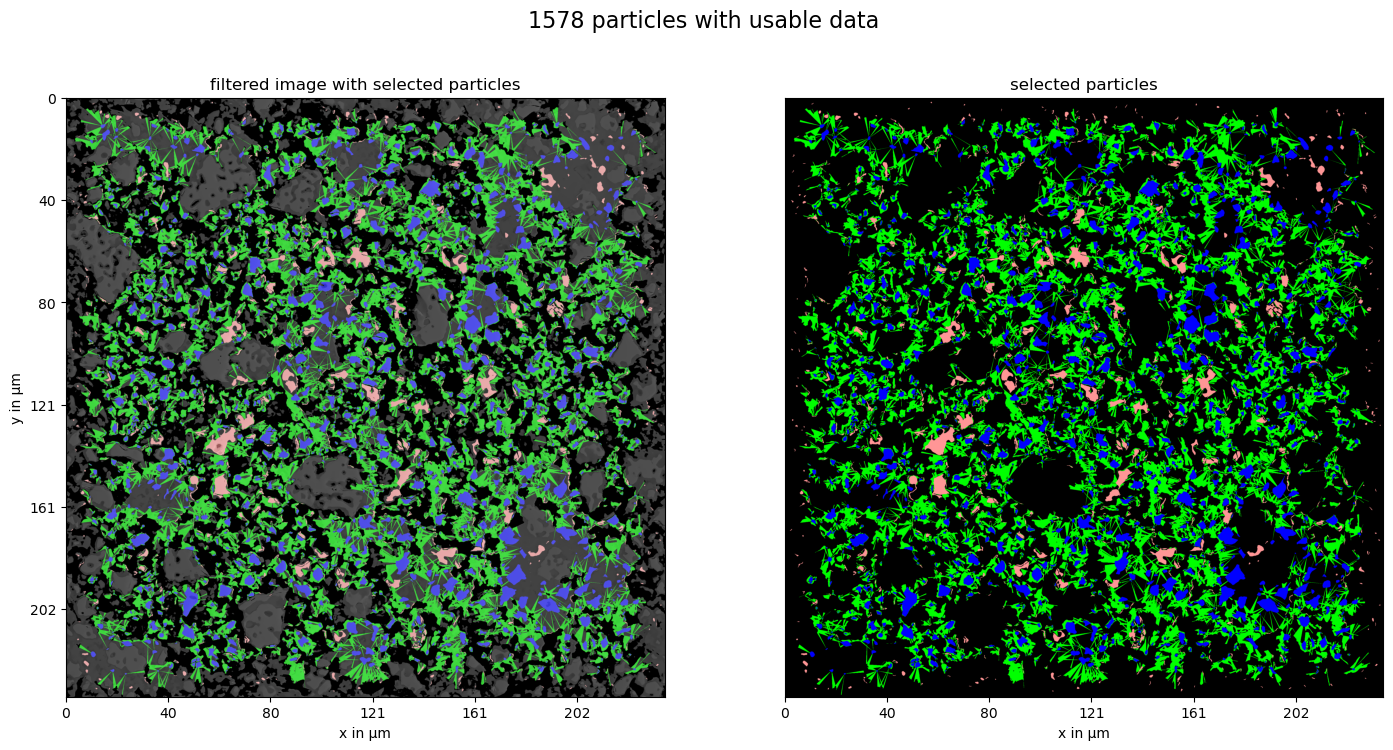

In [10]:
IP.show_processed_particles(  )